In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

"""
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

# Import data
train_csv = pd.read_csv("../input/birdsong-recognition/train.csv")
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21375 entries, 0 to 21374
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rating            21375 non-null  float64
 1   playback_used     19575 non-null  object 
 2   ebird_code        21375 non-null  object 
 3   channels          21375 non-null  object 
 4   date              21375 non-null  object 
 5   pitch             21375 non-null  object 
 6   duration          21375 non-null  int64  
 7   filename          21375 non-null  object 
 8   speed             21375 non-null  object 
 9   species           21375 non-null  object 
 10  number_of_notes   21375 non-null  object 
 11  title             21375 non-null  object 
 12  secondary_labels  21375 non-null  object 
 13  bird_seen         19575 non-null  object 
 14  sci_name          21375 non-null  object 
 15  location          21375 non-null  object 
 16  latitude          21375 non-null  object

# 1. Number of bird species

In [2]:
print("There are {:,} unique bird species in the dataset.".format(len(train_csv['species'].unique())))

There are 264 unique bird species in the dataset.


# 2. Number of audio files

In [4]:
print("There are {:,} audio files in the dataset.".format(len(train_csv['filename'].unique())))

There are 21,375 audio files in the dataset.


# 3. Number of individuals for each species

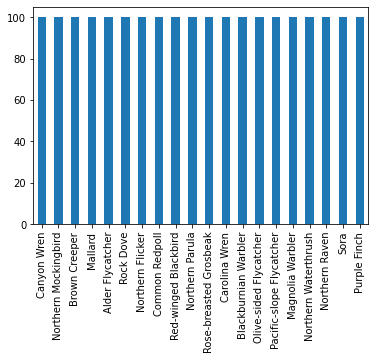

In [5]:
# Plot the counts of first 20 bird species sorted by quantity
train_csv['species'].value_counts().head(20).plot.bar()

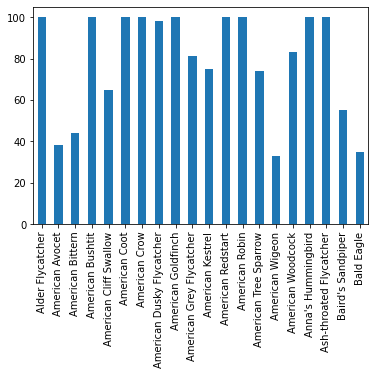

In [6]:
# Plot the counts of first 20 bird species sorted alphabetically
train_csv['species'].value_counts().sort_index(ascending=True).head(20).plot.bar()

# 4. Elevation

Text(0.5, 1.0, 'Top 10 Elevation Types')

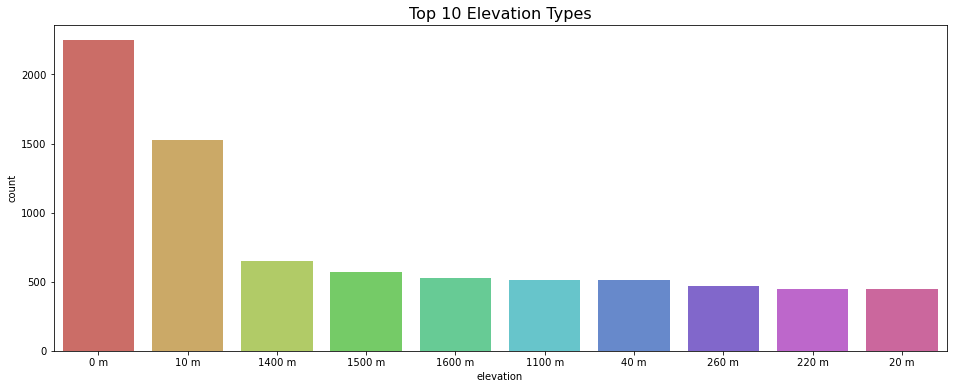

In [12]:
top_10 = list(train_csv['elevation'].value_counts().head(10).reset_index()['index'])
data = train_csv[train_csv['elevation'].isin(top_10)]

plt.figure(figsize=(16, 6))
ax = sns.countplot(data['elevation'], palette="hls", order = data['elevation'].value_counts().index)

plt.title("Top 10 Elevation Types", fontsize=16)

# 5. Countries

Text(0.5, 1.0, 'Top 10 Countries with bird recordings')

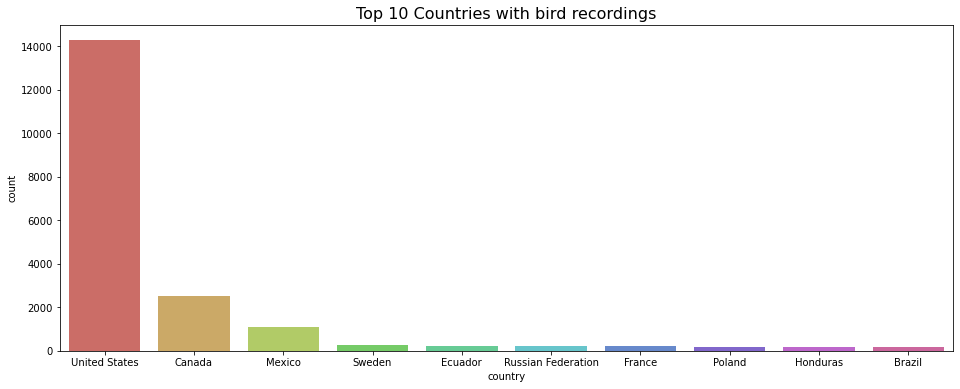

In [15]:
top_10 = list(train_csv['country'].value_counts().head(10).reset_index()['index'])
data = train_csv[train_csv['country'].isin(top_10)]

plt.figure(figsize=(16, 6))
ax = sns.countplot(data['country'], palette="hls", order = data['country'].value_counts().index)

plt.title("Top 10 Countries with bird recordings", fontsize=16)

# 6. Dates of recording

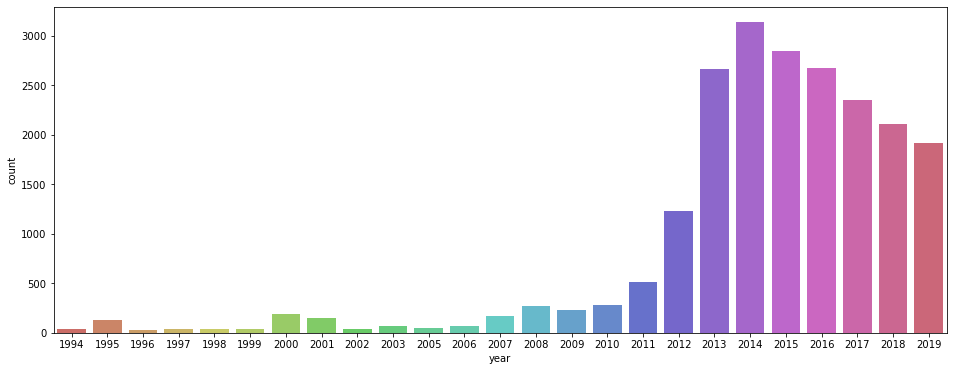

In [21]:
def get_year(date):
    return date.split('-')[0]

train_csv['year'] = train_csv['date'].apply(get_year)

top_25 = list(train_csv['year'].value_counts().head(25).reset_index()['index'])
data = train_csv[train_csv['year'].isin(top_25)]

plt.figure(figsize=(16, 6))
ax = sns.countplot(data['year'], palette="hls")

# 7. Bird seen

In [22]:
train_csv['bird_seen'].fillna('Not Defined',inplace=True)
labels = train_csv['bird_seen'].value_counts().index
values = train_csv['bird_seen'].value_counts().values
colors=['#3795bf','#bfbfbf', '#cf5353']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial',marker=dict(colors=colors))])
fig.show()

# 8. Number of notes

Text(0.5, 0, 'Number of notes')

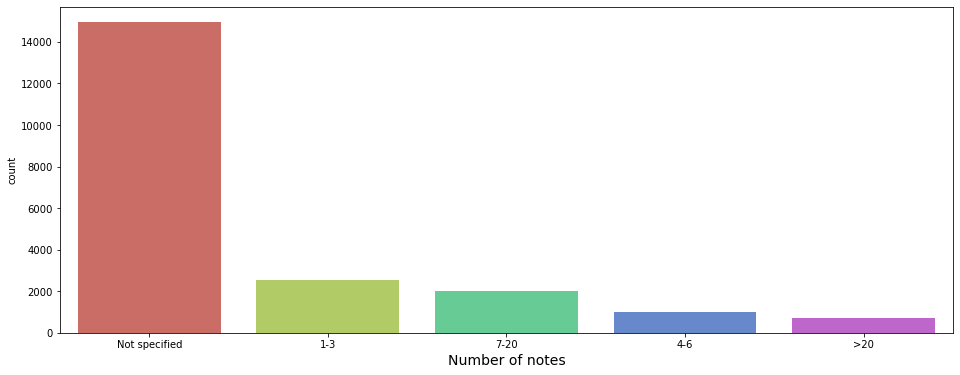

In [27]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(data['number_of_notes'], palette="hls", order = data['number_of_notes'].value_counts().index)
plt.xlabel("Number of notes", fontsize=14)

# 9. Playback Used

In [9]:
train_csv['playback_used'].fillna('Not Defined',inplace=True)
labels = train_csv['playback_used'].value_counts().index
values = train_csv['playback_used'].value_counts().values
colors=['#3795bf','#bfbfbf', '#cf5353']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial',marker=dict(colors=colors))])
fig.show()

# 10. Duration

In [35]:
print(train_csv['duration'].describe())

The mean duration of a recording is 55.807.


# 11. Channels

In [29]:
train_csv['channels'].fillna('Not Defined',inplace=True)
labels = train_csv['channels'].value_counts().index
values = train_csv['channels'].value_counts().values
colors=['#3795bf','#bfbfbf', '#cf5353']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial',marker=dict(colors=colors))])
fig.show()

Reference:<br/>
https://towardsdatascience.com/15-data-exploration-techniques-to-go-from-data-to-insights-93f66e6805df <br/>
https://www.kaggle.com/andradaolteanu/birdcall-recognition-eda-and-audio-fe <br/>
https://www.kaggle.com/parulpandey/eda-and-audio-processing-with-python